In [1]:
import sys
sys.path.append('E:/Graduate Study Material/ML/Assignments/hw5')
import mltools as ml
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from scipy import linalg

# P1: Clustering
## 1.1

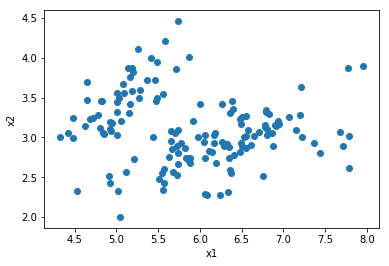

In [2]:
path = "E:/Graduate Study Material/ML/Assignments/hw5/data/iris.txt"
iris = np.genfromtxt(path, delimiter = None) # load the text file
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
plt.scatter(X[:,0], X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In my opinion, based on the plot of x1 and x2 above, there can be two clusters. One of them is in the top left corner, and the other of them is in the bottom right corner.

## 1.2

I choose 5 different initializations for each k (three different 'random', one 'k++', one 'farthest') and examine whether they find the same solutions for each k. 

It turns out that when k=2, 'NO. 1 random' and 'NO. 3 random' have the same solutions, 'NO. 2 random', 'k++' and 'farthest' have the same solutions. But for k=5 and k=20, all the initializations have different solutions. 

For each k, I pick the initialization with the best score (in this case, the best score means the smallest sum of squared euclidean distances) and plot the final assignment of the clusters and the cluster centers.

K= 2 	 init=NO. 1 random 	 sumd= 57.877648396983034
K= 2 	 init=NO. 2 random 	 sumd= 57.87966196118197
K= 2 	 init=NO. 3 random 	 sumd= 57.877648396983034
K= 2 	 init=NO. 4 k++ 	 sumd= 57.87966196118197
K= 2 	 init=NO. 5 farthest 	 sumd= 57.87966196118197
For K=2, init=NO.1 random has the smallest sumd


E:/Graduate Study Material/ML/Assignments/hw5\mltools\plot.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  hld = axis.ishold();
E:/Graduate Study Material/ML/Assignments/hw5\mltools\plot.py:43: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  axis.hold(True);
D:\Anaconda\install\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
D:\Anaconda\install\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
E:/Graduate Study Material/ML/Assignments/hw5\mltools\

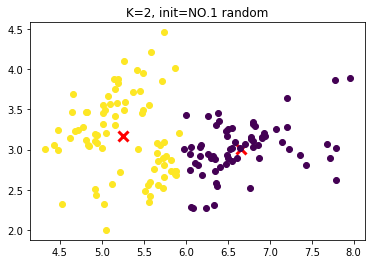

K= 5 	 init=NO. 1 random 	 sumd= 23.438643757297644
K= 5 	 init=NO. 2 random 	 sumd= 20.886682200353754
K= 5 	 init=NO. 3 random 	 sumd= 25.138941899584196
K= 5 	 init=NO. 4 k++ 	 sumd= 21.32887504357866
K= 5 	 init=NO. 5 farthest 	 sumd= 21.0902063018713
For K=5, init=NO.2 random has the smallest sumd


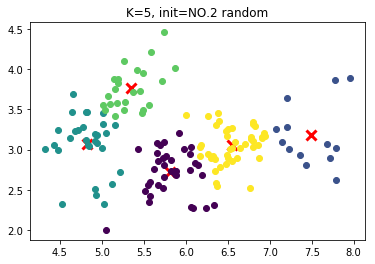

K= 20 	 init=NO. 1 random 	 sumd= 4.848796922616994
K= 20 	 init=NO. 2 random 	 sumd= 6.375178437745638
K= 20 	 init=NO. 3 random 	 sumd= 4.901454051727956
K= 20 	 init=NO. 4 k++ 	 sumd= 4.4861485361883435
K= 20 	 init=NO. 5 farthest 	 sumd= 5.364422190862036
For K=20, init=NO.4 k++ has the smallest sumd


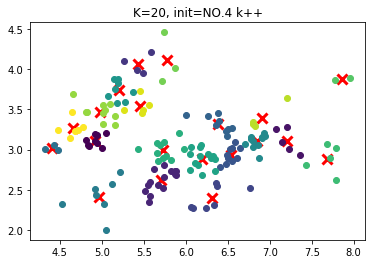

In [3]:
# define different k and initializations
n_clusters = [2,5,20]
n_init = ['random','random','random','k++','farthest']
z=[0]*len(n_init)
mu=[0]*len(n_init)
ssd=[0]*len(n_init)

for i,cluster in enumerate(n_clusters):
    for j,initial in enumerate(n_init): 
        # get different random seed for the three 'random' initializations
        np.random.seed(j*10)
        z[j], mu[j], ssd[j] = ml.cluster.kmeans\
        (X, K=cluster, init=initial, max_iter=100)
        print("K=",cluster, "\t init=NO.",j+1,initial, "\t sumd=", ssd[j])
    # For each K, check whether different initializations find the same solution    
    if len(set(ssd)) != 1:
        # if different solutions, pick the one with the best score (smallest sumd)
        best = ssd.index(np.min(ssd))
        print('For K=%d, init=NO.%d %s has the smallest sumd'\
              %(cluster,best+1,n_init[best]))
        plt.scatter(mu[best][:, 0], mu[best][:, 1], s=100, \
                    marker='x', facecolor='red', lw=3)
        
        ml.plotClassify2D(None, X, z[best])
        plt.title('K=%d, init=NO.%d %s' % (cluster, best+1, n_init[best]))
        plt.show()
    else:
        print('These initializations find the same solution')

## 1.3

E:/Graduate Study Material/ML/Assignments/hw5\mltools\plot.py:42: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  hld = axis.ishold();
E:/Graduate Study Material/ML/Assignments/hw5\mltools\plot.py:43: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  axis.hold(True);
E:/Graduate Study Material/ML/Assignments/hw5\mltools\plot.py:64: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  axis.axis(ax); axis.hold(hld)


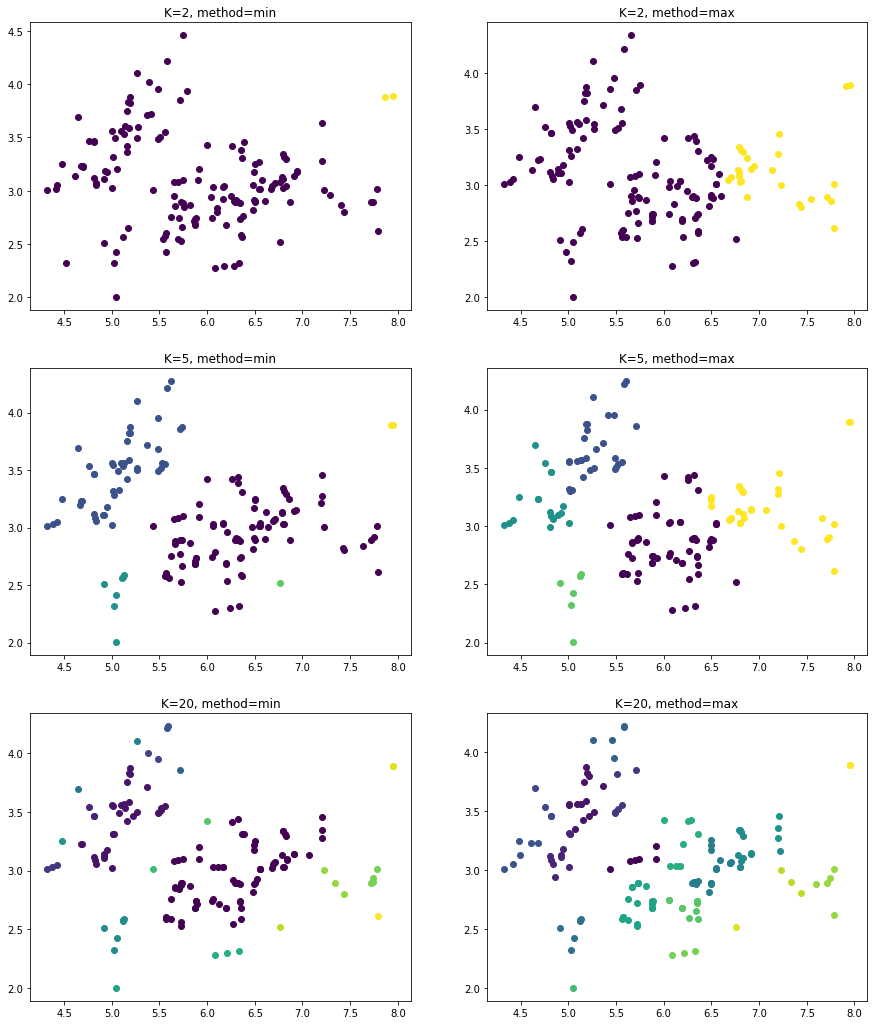

In [4]:
# define 'single linkage' and 'complete linkage' methods.       
n_method = ['min','max']
fig, ax = plt.subplots(len(n_clusters),len(n_method),figsize = (15, 18))
for i,cluster in enumerate(n_clusters):
    for n,md in enumerate(n_method):
        z, join = ml.cluster.agglomerative(X, K=cluster, method=md, join=None)
        ml.plotClassify2D(None, X, z, axis=ax[i][n])
        ax[i][n].set_title('K=%d, method=%s' % (cluster, md))
plt.show()

The 'single linkage' is 'min' method, and 'complete linkage' is 'max' method.

## 1.4

Differences: K-means clustering are more likely to evenly group the points into different clusters with similar size. As for agglomerative clustering, 'single linkage' tries to group density points into some clusters with large size while group some outliers as clusters with quite small size, so it produces minimal spanning tree. However, 'complete linkage' avoids elongated clusters. 

Similarities: the result of 'complete linkage' is kind of similar to K-means.

# P2: EigenFaces

First, load the data and display the first 10 faces to gain knowledge of the data format.

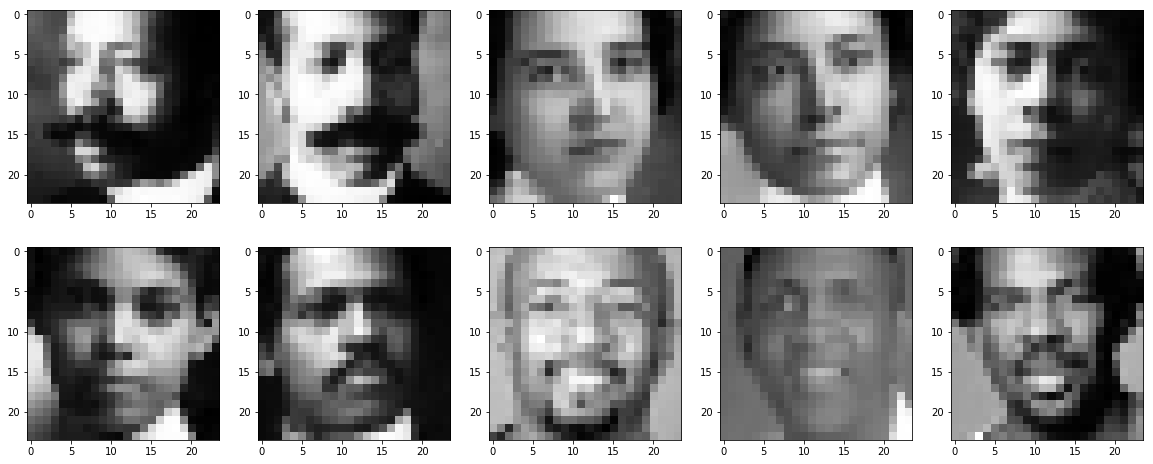

In [5]:
path = "E:/Graduate Study Material/ML/Assignments/hw5/data/faces.txt"
X = np.genfromtxt(path, delimiter=None) # load face dataset

# pick the first 10 faces for display
f, ax = plt.subplots(2, 5, figsize=(20, 8))
ax = ax.flatten()
for i in range(len(ax)):
    # convert vectorized data to 24x24 image patches
    img = np.reshape(X[i,:] ,(24, 24))  
    ax[i].imshow(img.T , cmap="gray")  # display image patch;
plt.show()

## 2.1

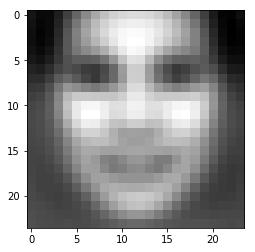

In [6]:
mu = np.mean( X, axis=0, keepdims=True ) # find mean over data points
X0 = X - mu # zero-center the data

# Plot the mean face
plt.figure()
img = np.reshape(mu,(24,24)) 
plt.imshow( img.T , cmap="gray") 
plt.show()

## 2.2

In [7]:
U,S,Vh = linalg.svd(X0, full_matrices = False) # X0 = U * diag(S) * Vh
W = U.dot(np.diag(S)) # W = U * diag(S)
print('Shapes of W:', W.shape)
print('Shapes of Vh:', Vh.shape)

Shapes of W: (4916, 576)
Shapes of Vh: (576, 576)


## 2.3

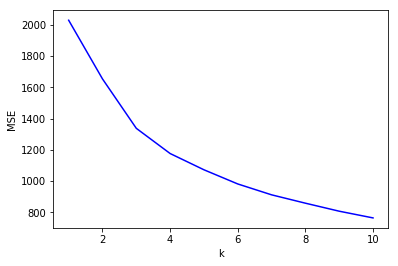

In [8]:
K = range(1,11)
mse = np.zeros(len(K))
for i,k in enumerate(K):
    # approx using k largest eigendirections
    X0hat = W[:,:k].dot(Vh[:k,:])
    # compute the mean squared error in the SVD’s approximation
    mse[i] = np.mean((X0 - X0hat)**2)
plt.plot(K, mse, color='b')
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()

The plot shows that as k increases, MSE in the SVD’s approximation will decrease.

## 2.4

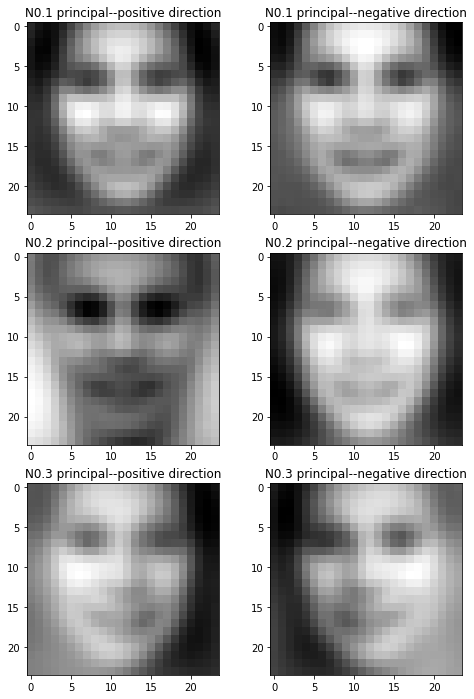

In [9]:
fig, ax = plt.subplots(3,2,figsize = (8, 12))
for i in range(3):       
    alpha = 2*np.median(np.abs(W[:,i]))
    img1 = np.reshape(mu + alpha*Vh[i,:],(24,24))
    img2 = np.reshape(mu - alpha*Vh[i,:],(24,24))
    ax[i][0].imshow( img1.T , cmap="gray")
    ax[i][0].set_title('N0.%d principal--positive direction' % (i+1))
    ax[i][1].imshow( img2.T , cmap="gray")
    ax[i][1].set_title('N0.%d principal--negative direction' % (i+1))
plt.show()

## 2.5

I choose the 1st and 6th faces and reconstruct them for K = 5, 10, 50, 100.

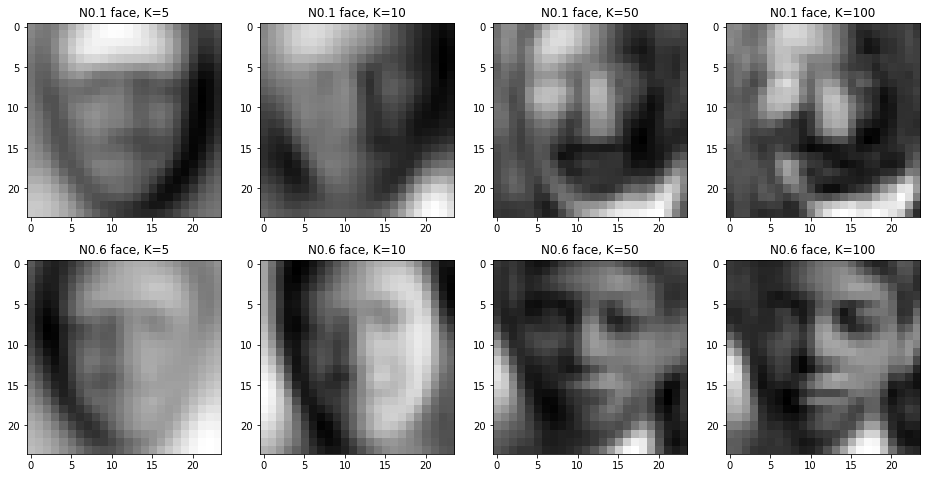

In [10]:
fig, ax = plt.subplots(2,4,figsize = (16, 8))
K = [5, 10, 50, 100]
Xn = [1,6]
for i,n in enumerate(Xn):
    for j,k in enumerate(K):
        Xnhat = W[n-1,:k].dot(Vh[:k,:])
        img = np.reshape(Xnhat,(24,24)) 
        ax[i][j].imshow( img.T , cmap="gray")
        ax[i][j].set_title('N0.%d face, K=%d' % (n,k))
plt.show()

The result shows when K becomes larger, the face becomes closer to the original.

## 2.6

I randomly choose 25 faces, and display them as images with the coordinates given by their coefficients on the first two principal components.

D:\Anaconda\install\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """
D:\Anaconda\install\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
D:\Anaconda\install\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


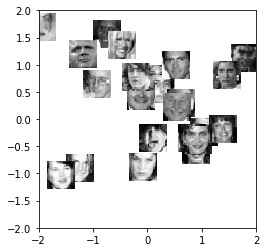

In [11]:
idx = np.random.randint(0, len(X), 25) 
# pick some data randomly; an array of integer indices

coord,params = ml.transforms.rescale( W[:,0:2] )
# normalize scale of "W" locations
plt.figure(); plt.hold(True); # you may need this for pyplot
for i in idx:
    # compute where to place image (scaled W values) & size
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-2,2,-2,2) ) # set axis to a reasonable scale
plt.show()

# Statement of Collaboration